<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow/Probabilistic/Distributions/Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Distributions

## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

Distribution: tfp.distributions.Normal("Normal", batch_shape=[3], event_shape=[], dtype=float32)


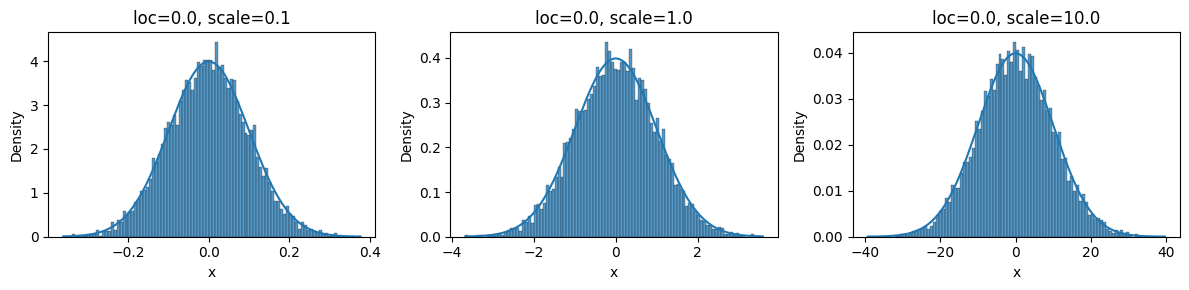

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a normal distribution from Tensorflow Distributions
uvNormal = tfp.distributions.Normal(loc=[0], scale=[0.1, 1, 10])
print("Distribution:", uvNormal)
# Sample multiple times from the chosen distribution...
samples = uvNormal.sample(sample_shape=10000)
# Obtain value of probability's density
pdf = uvNormal.prob(value=samples)

# Plot a histogram, approximating the density
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
locs = uvNormal.loc.numpy()
scales = uvNormal.scale.numpy()
for i, ax in enumerate(axes):
    sns.histplot(ax=ax, x=samples[:, i], bins=100, stat="density")
    sns.lineplot(ax=ax, x=samples[:, i], y=pdf[:, i])
    ax.set_title(label=f"loc={locs[0]:.1f}, scale={scales[i]:.1f}")
    ax.set_xlabel(xlabel="x")
fig.tight_layout()
plt.show()

#### Work with batch distributions

Distribution: tfp.distributions.Bernoulli("Bernoulli", batch_shape=[3], event_shape=[], dtype=int32)


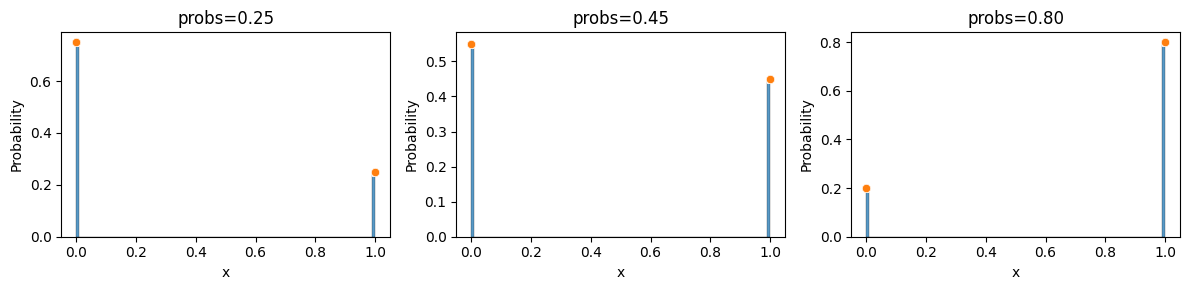

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a batched Bernoulli distribution (discrete)
uvBernoulli = tfp.distributions.Bernoulli(probs=[0.25, 0.45, 0.8])
print("Distribution:", uvBernoulli)
# Sample from this batch of distributions
samples = uvBernoulli.sample(sample_shape=10000)
# Determine probabilities from this batch distribution
pmf = uvBernoulli.prob(value=samples)

# Plot a histogram, approximating the density
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
probs = uvBernoulli.probs
for i, ax in enumerate(axes):
    sns.histplot(ax=ax, x=samples[:, i], bins=100, stat="probability")
    sns.scatterplot(ax=ax, x=samples[:, i], y=pmf[:, i])
    ax.set_title(label=f"probs={probs[i]:.2f}")
    ax.set_xlabel(xlabel="x")
fig.tight_layout()
plt.show()

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


#### Batches of multivariate distributions

Distribution: tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float32)


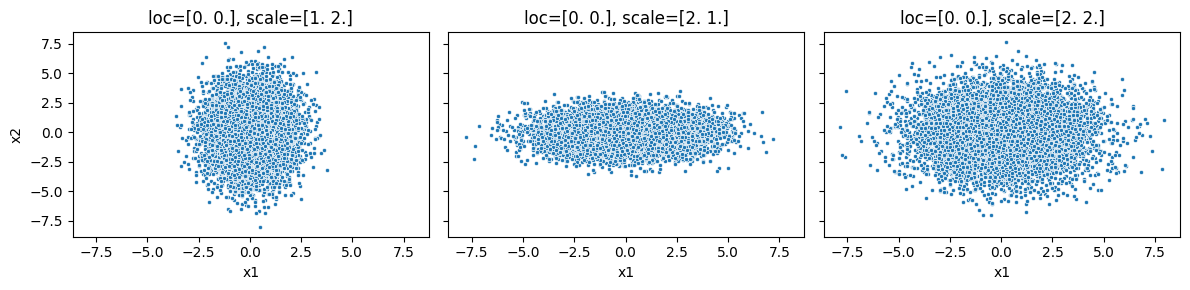

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)
import matplotlib.pyplot as plt
import seaborn as sns

# Define 2D multivariate Gaussian with diagonal covariance matrix
# Create three "batches" of multivariate normals
mvNormal = tfp.distributions.MultivariateNormalDiag(
    loc=[[0, 0]], scale_diag=[[1, 2], [2, 1], [2, 2]])
print("Distribution:", mvNormal)

# Create a sample for a plot -- notice the shape
samples = mvNormal.sample(sample_shape=10000)

# Plot samples from the batched multivariate Gaussian
fig, axes = plt.subplots(nrows=1, ncols=3,
    sharex=True, sharey=True, figsize=(12, 3))
locs = mvNormal.loc.numpy()
scales = mvNormal.scale.diag.numpy()
for i, ax in enumerate(axes):
    # take the ith batch [samples x event_shape]
    sample = samples[:, i, :]
    sns.scatterplot(ax=ax, x=sample[:, 0], y=sample[:, 1], marker=".")
    ax.set_title(label=f"loc={locs[0]}, scale={scales[i]}")
    ax.set_xlabel(xlabel="x1")
    ax.set_ylabel(ylabel="x2")
fig.tight_layout()
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution

Distribution: tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)


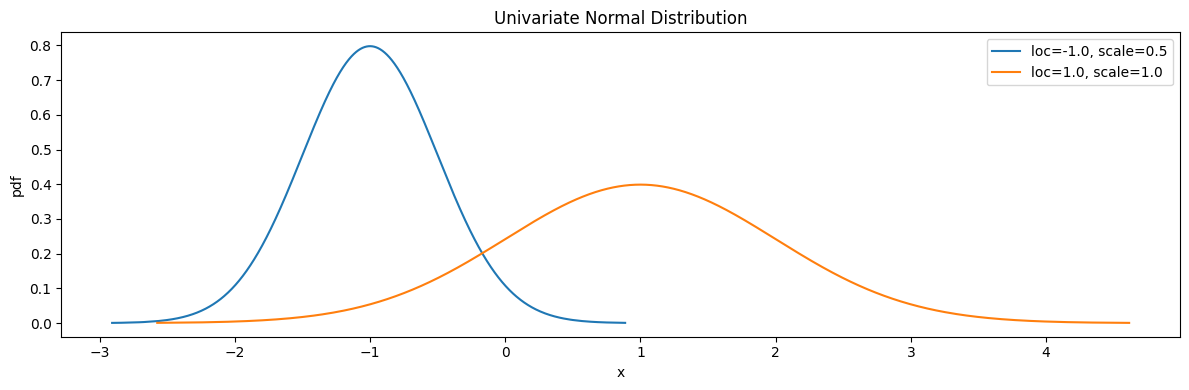

Distribution: tfp.distributions.Independent("IndependentNormal", batch_shape=[], event_shape=[2], dtype=float32)


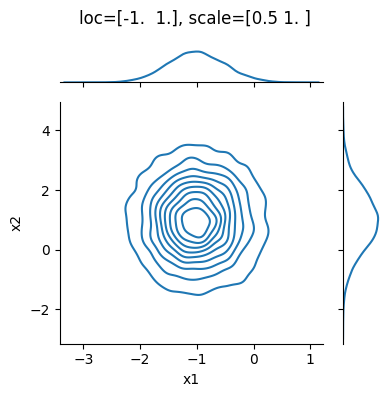

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import seaborn as sns

# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components
uvNormal = tfp.distributions.Normal(loc=[-1, 1], scale=[0.5, 1])
# Check the distribution
print("Distribution:", uvNormal)
# Univariate density functions
# each column is a vector of densities for one distribute normal
samples = uvNormal.sample(sample_shape=10000)
pdf = uvNormal.prob(value=samples)

plt.figure(figsize=(12, 4))
locs = uvNormal.loc.numpy()
scales = uvNormal.scale.numpy()
for i in range(2):
    sns.lineplot(x=samples[:, i], y=pdf[:, i],
        label=f"loc={locs[i]:.1f}, scale={scales[i]:.1f}")
plt.title(label="Univariate Normal Distribution")
plt.ylabel(ylabel="pdf")
plt.xlabel(xlabel="x")
plt.legend()
plt.tight_layout()
plt.show()

# Summarise how Independent has been used
# Use Independent to convert the batch shape to the event shape
idNormal = tfp.distributions.Independent(
    distribution=uvNormal, reinterpreted_batch_ndims=1)
# Note that dimension from batch_shape has shifted to event_shape
print("Distribution:", idNormal)
# Create a plot showing joint density contours and marginal density functions
samples = idNormal.sample(sample_shape=10000)

g = sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind="kde", height=4)
g.fig.suptitle(t=f"loc={locs}, scale={scales}")
g.set_axis_labels(xlabel="x1", ylabel="x2")
plt.tight_layout()
plt.show()

#### Shifting batch dimensions to event dimensions using
`reinterpreted_batch_ndims`

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
import tensorflow_probability as tfp

# Demonstrate use of reinterpreted batch ndims
uvNormal = tfp.distributions.Normal(
    loc=[[-1], [0], [1]],
    scale=[1, 10])
print("Univariate Distribution:", uvNormal)

idNormal = tfp.distributions.Independent(
    distribution=uvNormal, reinterpreted_batch_ndims=2)
print("Independent Distribution:", idNormal)

sample = tf.random.normal(shape=[10, 3, 2])
prob = idNormal.prob(value=sample)
print(f"Sample shape {sample.shape}, Prob shape {prob.shape}")

Univariate Distribution: tfp.distributions.Normal("Normal", batch_shape=[3, 2], event_shape=[], dtype=float32)
Independent Distribution: tfp.distributions.Independent("IndependentNormal", batch_shape=[], event_shape=[3, 2], dtype=float32)
Sample shape (10, 3, 2), Prob shape (10,)


***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
import tensorflow_probability as tfp

# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag`
# against each other

loc = tf.constant(value=[
    [[0.3, 1.5, 1], [0.2, 0.4, 2.8]],
    [[2., 2.3, 8], [1.4, 1, 1.3]]
], dtype=tf.float32) # (2, 2, 3)
scale_diag = tf.constant(value=[0.4, 1, 0.7], dtype=tf.float32) # (3,)
mvNormal = tfp.distributions.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
print(mvNormal)

# Use independent to move part of the batch shape
idNormal = tfp.distributions.Independent(distribution=mvNormal,
    reinterpreted_batch_ndims=1)
print(idNormal)

# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]
sample = tf.random.normal(shape=(10, 1, 2, 1))
print("Prob shape:", idNormal.log_prob(value=sample).shape)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[2, 2], event_shape=[3], dtype=float32)
tfp.distributions.Independent("IndependentMultivariateNormalDiag", batch_shape=[2], event_shape=[2, 3], dtype=float32)
Prob shape: (10, 2)


***
<a id='trainable_distributions'></a>
## Trainable Distributions

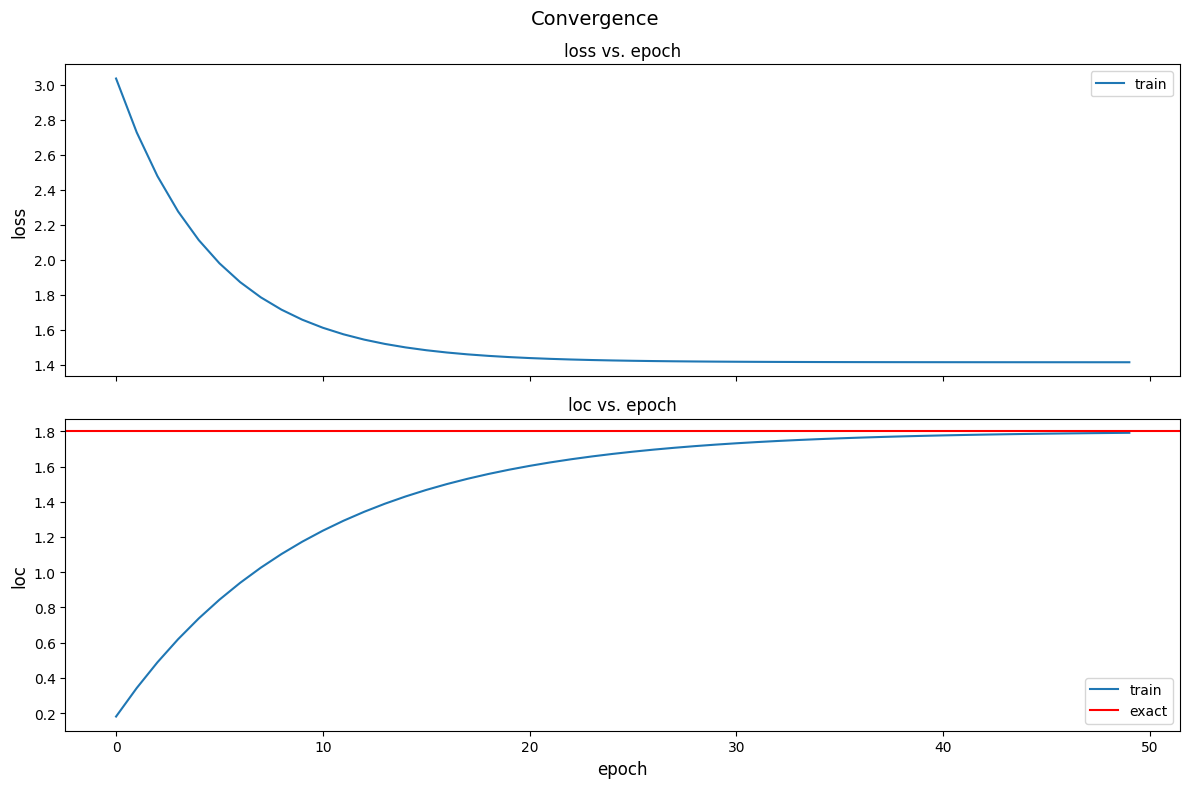

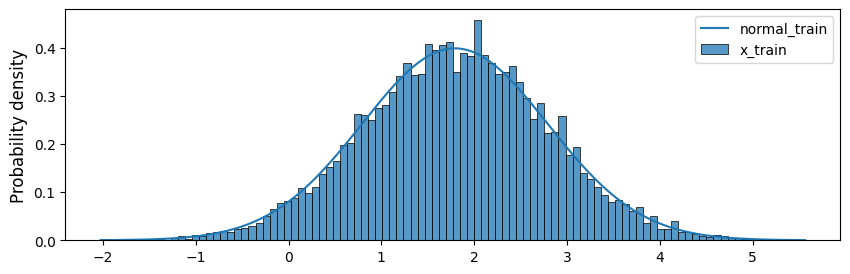

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_train = tf.random.normal(shape=(10000,), mean=1.79, stddev=1.)
x_train_mean = tf.math.reduce_mean(input_tensor=x_train)

normal = tfp.distributions.Normal(
    loc=tf.Variable(initial_value=0., name='loc'), scale=1.)

def nll(x):
    return -tf.math.reduce_mean(
        input_tensor=normal.log_prob(value=x))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
@tf.function
def train(x):
    vars = normal.trainable_variables
    with tf.GradientTape() as tape:
        tape.watch(vars)
        loss = nll(x=x)
        grads = tape.gradient(target=loss, sources=vars)
    optimizer.apply_gradients(grads_and_vars=zip(grads, vars))
    return loss

history = {"train_loss": [], "train_loc": []}
for _ in range(50):
    loss = train(x=x_train)
    history["train_loss"].append(loss.numpy())
    history["train_loc"].append(normal.loc.numpy())

df_history = pd.DataFrame(history)
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.suptitle(t="Convergence", fontsize=14)
for ax, metric in zip(axes, ["loss", "loc"]):
    sns.lineplot(ax=ax, data=df_history, label="train",
        x=df_history.index, y=f"train_{metric}")
    ax.set_ylabel(ylabel=f"{metric}", fontsize=12)
    ax.set_title(label=f"{metric} vs. epoch")
plt.axhline(y=x_train_mean, label="exact", color="red")
plt.xlabel(xlabel="epoch", fontsize=12)
plt.legend(loc="best")
fig.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
x_plt = x_train.numpy()
sns.histplot(x=x_plt, stat="density",
    bins=100, label="x_train")
sns.lineplot(x=x_plt, y=normal.prob(value=x_plt),
    label="normal_train")
plt.ylabel(ylabel="Probability density", fontsize=12)
plt.legend(loc="best")
plt.show()

## Naive Bayes classifier

### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, in later tutorials we will learn them.

In [1]:
# Convenience function for retrieving the 20 newsgroups data set
# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.
# 18000 newsgroups, posts on 20 topics

from sklearn import datasets
import numpy as np

# Get the data
newsgrp = datasets.fetch_20newsgroups(data_home="data/newsgrp")

# Example article
idx = 3
print("Data:\n", newsgrp["data"][idx])
# Associated label
print("Target:\n", newsgrp["target"][idx])

# Name of label
print("Target name:\n", np.unique(newsgrp["target_names"]))

Data:
 From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters

Target:
 1
Target name:
 ['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos

In [2]:
from sklearn import datasets, feature_extraction

# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):
    data_train = datasets.fetch_20newsgroups(
        data_home="data/newsgrp", subset="train",
        categories=categories)
    x_train, y_train = data_train["data"], data_train["target"]
    data_test = datasets.fetch_20newsgroups(
        data_home="data/newsgrp", subset="test",
        categories=categories)
    x_test, y_test = data_test["data"], data_test["target"]
    return (x_train, y_train), (x_test, y_test)

# Getting a subset of the 20 newsgroup dataset
categories = ["alt.atheism", "talk.religion.misc",
    "comp.graphics", "sci.space"]
(x_train, y_train), (x_test, y_test) = get_data(categories=categories)

# Preprocessing boilerplate
# Ignore common words, words that appear once
vectorizer = feature_extraction.text.CountVectorizer(
    input="content", binary=True, max_df=0.25,
    min_df=1.01/len(y_train))
# Input is a list of strings
x_train = vectorizer.fit_transform(raw_documents=x_train)
x_test = vectorizer.transform(raw_documents=x_test)

# Check shape
print("x_train shape:", x_train.shape)
# Check that the fit has been successful
vectorizer.inverse_transform(x_train[1, :])

x_train shape: (2034, 17495)


[array(['nothing', 'biblical', 'backing', 'koresh', '02', 'tape', 'cites',
        'enclosed', 'almanac', 'bc', 'ca', 'ken', 'old', 'frog', '20',
        '20apr199301460499', 'utarlg', 'uta', 'b645zaw', 'stephen',
        'seems', 'yet', 'another', 'messenger', 'got', 'killed', 'message',
        'he', 'carried', 'says', 'evidence', 'contrary', 'simply',
        'fanatic', 'thought', 'neccessary', 'take', 'whole', 'bunch',
        'folks', 'him', 'children', 'satisfy', 'his', 'delusional',
        'mania', 'jim', 'jones', 'circa', '1993', 'mean', 'time', 'sure',
        'learned', 'lot', 'evil', 'corruption', 'surprised', 'things',
        'gotten', 'rotten', 'nope', 'been', 'demonstrating', 'such',
        'centuries', '604', '245', 'v32', 'sco', 'gt', 'british',
        'columbia', 'canada', 'serving', 'central', 'vancouver', 'island',
        'public', 'access', 'usenet', 'internet', 'mail', 'home',
        'holocaust'], dtype='<U79')]

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocab` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$.

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [3]:
import numpy as np

# Defining a function to conduct Laplace smoothing. This adds a base
# level of probability for a given feature to occur in every class.
def laplace_smoothing(x, y):
    # Compute the parameter estimates (adjusted fraction of documents
    # in class that contain word)
    n_classes = y.max() + 1
    n_words = x.shape[1]
    # parameters for Laplace smoothing
    alpha = 1
    # stores parameter values - prob. word given class
    theta = np.zeros([n_classes, n_words])
    # 0, 1, ..., 19
    for c in range(n_classes):
        class_mask = (y==c)
        # number of articles in class
        N = class_mask.sum()
        theta[c, :] = (x[class_mask, :].sum(axis=0)
            + alpha)/(N + 2*alpha)
    return theta

theta = laplace_smoothing(x=x_train.todense(), y=y_train)
print("theta shape:", theta.shape)

# Check whether the most probable word in each class is reasonable
# most probable word for each class
most_word = theta.argmax(axis=1)
# Dict that will be useful later
vocab = {v:k for k, v in vectorizer.vocabulary_.items()}
for j, i in enumerate(most_word):
    print('Most probable word in class {} is "{}".'.format(
        y_train[j], vocab[i]))

theta shape: (4, 17495)
Most probable word in class 1 is "people".
Most probable word in class 3 is "graphics".
Most probable word in class 2 is "space".
Most probable word in class 0 is "he".


To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

In [4]:
import numpy as np

# Function which computes the prior probability of every class
# based on frequency of occurence in the dataset

def class_priors(y):
    n_classes = y.max() + 1
    counts = np.zeros(n_classes)
    for c in range(n_classes):
        counts[c] = np.sum(np.where(y==c, 1, 0))
    priors = counts / np.sum(counts)
    return priors

# Run the function
priors = class_priors(y=y_train)
print('The class priors are {}'.format(priors))

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [5]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)

# Now we will do a function that given the feature occurence counts
# returns a Bernoulli distribution of batch_shape=number of classes
# and event_shape=number of features.

def make_distributions(probs):
    distributions = tfp.distributions.Bernoulli(probs=probs)
    distributions = tfp.distributions.Independent(
        distribution=distributions, reinterpreted_batch_ndims=1)
    return distributions

distributions = make_distributions(probs=theta)
print("Distribution:", distributions)

Distribution: tfp.distributions.Independent("IndependentBernoulli", batch_shape=[4], event_shape=[17495], dtype=int32)


#### Computing log_probs

In [6]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
import numpy as np
from sklearn import metrics

# The final function predict_sample which given the distribution,
#  a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(distributions, sample, priors):
    conditional_probs = distributions.log_prob(value=sample)
    joint_likelihood = tf.math.add(
        x=np.log(priors).astype("float32"),
        y=conditional_probs)
    norm_factor = tf.math.reduce_logsumexp(
        input_tensor=joint_likelihood,
        axis=-1, keepdims=True)
    log_probs = joint_likelihood - norm_factor
    return log_probs

# Predicting one example from our test data
log_probs = predict_sample(distributions=distributions,
    sample=x_test[0].todense(), priors=priors)
print("Predict log probs:", log_probs)

# Loop over our test data and classify.
probabilities = []
for sample, label in zip(x_test.todense(), y_test):
    probabilities.append(tf.exp(predict_sample(
        distributions=distributions, sample=sample,
        priors=priors)))
probabilities = np.asarray(probabilities)
y_pred = np.argmax(probabilities, axis=-1)
print('F1 from tfp:', metrics.f1_score(
    y_true=y_test, y_pred=y_pred,
    average='macro'))

Predict log probs: tf.Tensor([-6.1736343e+01 -1.5258789e-05 -1.1620026e+01 -6.3327866e+01], shape=(4,), dtype=float32)
F1 from tfp: 0.7848499112849505


In [7]:
from sklearn import naive_bayes, metrics

# Make a Bernoulli Naive Bayes classifier using
# sklearn with the same level of alpha smoothing.

clf = naive_bayes.BernoulliNB(alpha=1)
clf.fit(X=x_train, y=y_train)
y_pred = clf.predict(X=x_test)
print('F1 from sklean:', metrics.f1_score(
    y_true=y_test, y_pred=y_pred,
    average='macro'))

F1 from sklean: 0.7848499112849505



%-------------------%
Class  0
%-------------------%


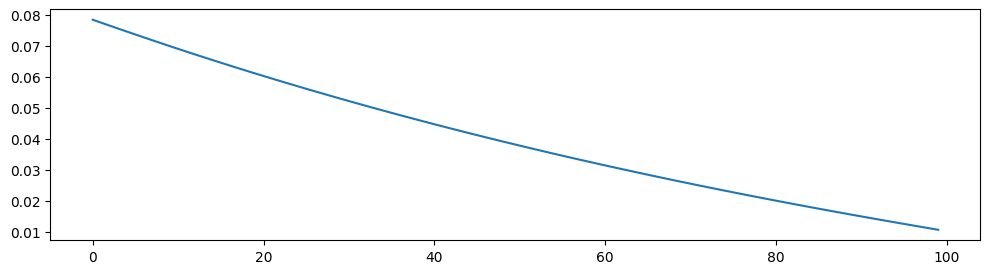


%-------------------%
Class  1
%-------------------%


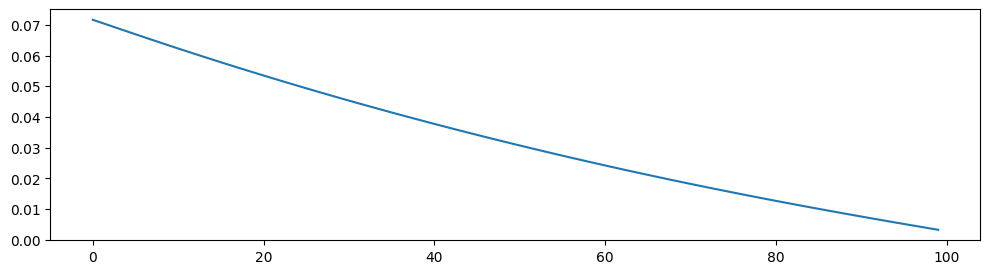


%-------------------%
Class  2
%-------------------%


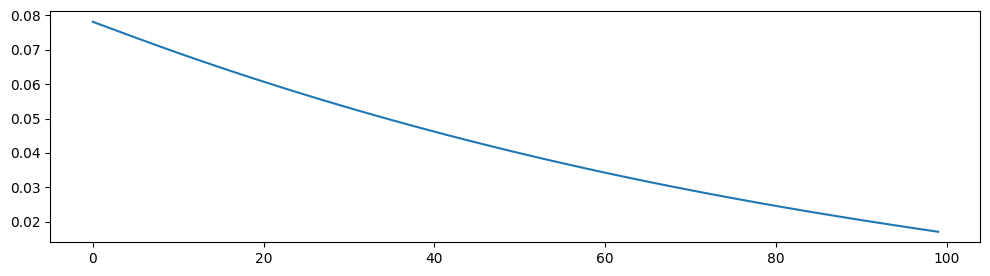


%-------------------%
Class  3
%-------------------%


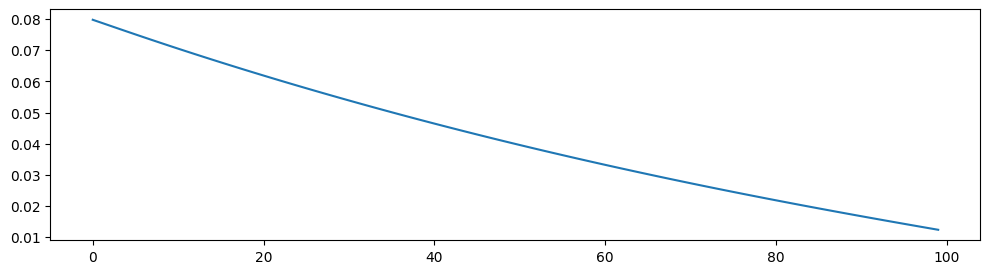

In [8]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def nll(x, distribution):
    return -tf.math.reduce_mean(
        input_tensor=distribution.log_prob(value=x))

@tf.function
def get_loss_grads(x, distribution):
    vars = distribution.trainable_variables
    with tf.GradientTape() as tape:
        tape.watch(vars)
        loss = nll(x=x, distribution=distribution)
        grads = tape.gradient(target=loss, sources=vars)
    return loss, grads

# Now we learn the distribution using gradient tape
def make_trained_distributions(x, y):
    n_classes = y.max() + 1
    probs = []
    for c in range(n_classes):
        prob = tf.Variable(initial_value=np.random.uniform(
            low=0.01, high=0.1, size=x.shape[-1]))
        distribution = tfp.distributions.Bernoulli(probs=prob)
        class_mask = (y==c)
        class_data = x[class_mask, :]

        print('\n%-------------------%')
        print('Class ', c)
        print('%-------------------%')

        optimizer = tf.keras.optimizers.Adam()
        losses = []
        for i in range(100):
            loss, grads = get_loss_grads(x=class_data,
                distribution=distribution)
            losses.append(loss)
            optimizer.apply_gradients(grads_and_vars=zip(
                grads, distribution.trainable_variables))
            clip_prob = tf.clip_by_value(
                t=distribution.trainable_variables,
                clip_value_min=1e-3, clip_value_max=1)
            prob = tf.squeeze(input=clip_prob)
        probs.append(prob)

        plt.figure(figsize=(12, 3))
        sns.lineplot(x=range(100), y=np.array(losses))
        plt.show()

    distributions = tfp.distributions.Bernoulli(probs=probs)
    distributions = tfp.distributions.Independent(
        distribution=distributions, reinterpreted_batch_ndims=1)

    return distributions

# Now train the distributions with gradient tape
trained_distributions = make_trained_distributions(
    x=x_train.todense(), y=y_train)

In [9]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
import numpy as np
from sklearn import metrics

# Compare the results.
probabilities = []
for sample, label in zip(x_test.todense(), y_test):
    probabilities.append(tf.exp(predict_sample(
        distributions=trained_distributions,
        sample=sample, priors=priors)))
probabilities = np.asarray(probabilities)
y_pred = np.argmax(probabilities, axis=-1)
print('F1 from trained tfp:', metrics.f1_score(
    y_true=y_test, y_pred=y_pred,
    average='macro'))

F1 from trained tfp: 0.834607151100081
